In [1]:
import pandas as pd
import os
import numpy as np



In [2]:
os.chdir('C:\\RESEARCH\\LUSC\\Site')

In [3]:
X=pd.read_excel('LUSC_flux_Site.xlsx',index_col=0)

In [4]:

X.shape

(501, 2051)

In [5]:
x=X.iloc[:,0:2049].values
y=X.iloc[:,-1].values

In [6]:
y

array(['L-Upper', 'L-Upper', 'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper',
       'L-Lower', 'R-Lower', 'R-Upper', 'L-Upper', 'R-Upper', 'L-Lower',
       'R-Lower', 'L-Lower', 'R-Lower', 'L-Lower', 'L-Upper', 'R-Lower',
       'L-Upper', 'R-Upper', 'L-Upper', 'L-Lower', 'L-Lower', 'R-Upper',
       'R-Lower', 'L-Upper', 'L-Lower', 'L-Lower', 'L-Lower', 'L-Upper',
       'L-Lower', 'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Lower',
       'L-Lower', 'L-Upper', 'R-Lower', 'R-Middle', 'R-Upper', 'R-Upper',
       'R-Lower', 'R-Upper', 'L-Upper', 'R-Lower', 'R-Lower', 'L-Upper',
       'L-Lower', 'L-Upper', 'L-Upper', 'R-Upper', 'L-Upper', 'R-Upper',
       'R-Lower', 'R-Upper', 'L-Upper', 'L-Lower', 'R-Lower', 'L-Upper',
       'L-Upper', 'R-Lower', 'R-Lower', 'L-Lower', 'L-Upper', 'L-Lower',
       'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'L-Lower', 'L-Upper',
       'R-Lower', 'R-Lower', 'L-Upper', 'L-Upper', 'R-Upper', 'R-Upper',
       'L-Lower', 'L-Lower', 'L-Lower', 'R-Middle'

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [10]:
# Fitting Decision Tree Classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [13]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6]) / cm.sum())
accuracy

0.2625

Confusion Matrix, without normalization
[[ 0  0  1  0  1  0  0]
 [ 0  1  5  0  2  1  5]
 [ 0  0 12  0  6  1  5]
 [ 0  0  1  1  0  0  2]
 [ 1  5  3  1  1  0  2]
 [ 0  0  1  0  0  0  0]
 [ 1  1 10  2  3  1  4]]


<Figure size 720x504 with 0 Axes>

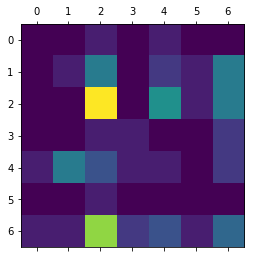

In [14]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.         0.         0.5        0.         0.5        0.
  0.        ]
 [0.         0.07142857 0.35714286 0.         0.14285714 0.07142857
  0.35714286]
 [0.         0.         0.5        0.         0.25       0.04166667
  0.20833333]
 [0.         0.         0.25       0.25       0.         0.
  0.5       ]
 [0.07692308 0.38461538 0.23076923 0.07692308 0.07692308 0.
  0.15384615]
 [0.         0.         1.         0.         0.         0.
  0.        ]
 [0.04545455 0.04545455 0.45454545 0.09090909 0.13636364 0.04545455
  0.18181818]]


<Figure size 432x288 with 0 Axes>

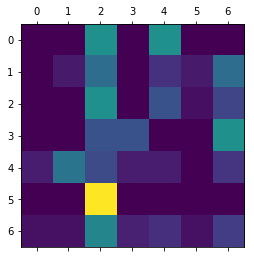

In [15]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [16]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         2
          1       0.14      0.07      0.10        14
          2       0.36      0.50      0.42        24
          3       0.25      0.25      0.25         4
          4       0.08      0.08      0.08        13
          5       0.00      0.00      0.00         1
          6       0.22      0.18      0.20        22

avg / total       0.22      0.24      0.22        80



In [17]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.008667265862084581

In [18]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.23465461994620207

In [ ]:

# Applying Grid Search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier() 


parameter_grid = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "random_state": [0, 1, 2, 3]}      

classifier = DecisionTreeClassifier()           

grid_search = GridSearchCV(classifier, param_grid = parameter_grid,
                           cv = 5, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Best_Score = grid_search.best_score_
Best_Param = grid_search.best_params_

# Applying Random Search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier = DecisionTreeClassifier() 

# Create the random grid
random_grid = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [3, 4, 5, 6, 7 , 8],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.1, 0.2, 0.3],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [20, 25, 30, 35, 40],
                  "min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4],
                  "presort": [False],
                  "random_state": [3, 4, 5, 10, 15]}
               
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=random_grid,
                              n_iter = 100,scoring='neg_mean_absolute_error',
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

random_search.fit(X_train, y_train)

Random_Best_Param = random_search.best_params_
Random_Best_Score = random_search.best_score_

# Applying Bayesian Search
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
from skopt import BayesSearchCV
search_spaces = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "random_state": [0, 1, 2, 3]}

class BayesSearchCV(BayesSearchCV):
    def _run_search(self, x): raise BaseException('Use newer skopt')

opt = BayesSearchCV(classifier, search_spaces, scoring="accuracy", cv = 10, n_jobs=1, random_state=0)
opt.fit(X_train, y_train)

Bayes_Best_Param = opt.best_params_
Bayes_Best_Score = opt.best_score_

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Decision Tree Classification to the Testing Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
